In [1]:
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i]) # way of dealing with array in numpy

In [3]:
 def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))#returns a new array of the given shape and type filled with zeros
        X = np.c_[np.ones((shape(X)[0],1)),X]#it will concatenate the two array in x and y axis
        return weights,X

In [4]:
#  definition for sigmoid function
def sigmoid(self,z):
    sig = 1/(1+e**(-z)) # ** in python in for power
    return sig


In [5]:
def cost(theta):
            z = dot(X,theta)#dot product of two arrays
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y) 
            return cost

In [6]:
def fit(self,X,y,alpha=0.001,iter=100):
        params,X = self.initialize(X)
        cost_list = np.zeros(iter,)
        for i in range(iter):
            params = params - alpha * dot(X.T, self.sigmoid(dot(X,params)) - np.reshape(y,(len(y),1)))
            cost_list[i] = cost(params)
        self.params = params
        return cost_list

In [7]:
def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)#dot product of arrays
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [8]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [9]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features=4)

(100, 4)
100
<class 'numpy.ndarray'>
-0.8456123084056115


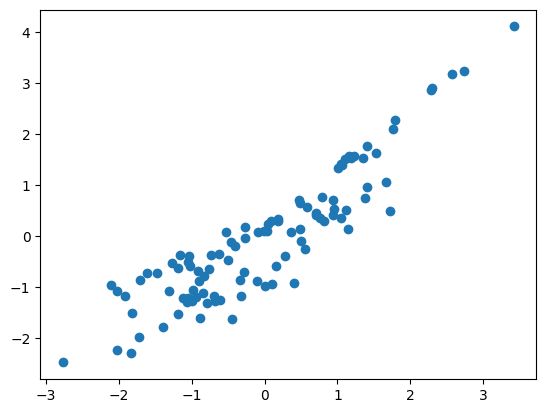

In [11]:
print(shape(X))#will return tuple (rows,cols)
print(len(X))# will print the rows of x
print(type(X))
plt.scatter(X[:,1],X[:,2])
# help(plt.scatter)
print(X[0][1])

In [12]:
data = pd.read_csv("bank.csv")

In [13]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [14]:
print(shape(data))

(4521, 17)


In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
z = data.loc[:,["age","marital"]]
print(z)

      age  marital
0      30  married
1      33  married
2      35   single
3      30  married
4      59  married
...   ...      ...
4516   33  married
4517   57  married
4518   57  married
4519   28  married
4520   44   single

[4521 rows x 2 columns]


Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Note that the newer :func:`histplot` function offers more functionality, although
    its default behavior is somewhat different.
    
    .. note::
        This function always treats one of the variables as categorical and
        draws data at ordinal positions (0, 1, ... n) on the relevant axis,
        even when the data has a numeric or date type.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.    
    


<AxesSubplot: xlabel='age', ylabel='Count'>

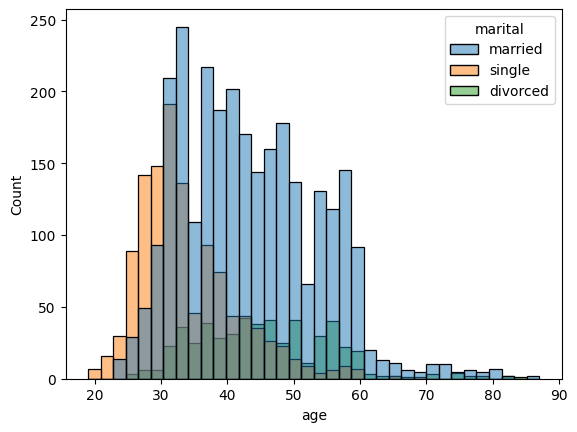

In [18]:
help(sns.countplot)
sns.histplot(data=z,x="age",hue ="marital")